In [3]:
#dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps

#creating file paths for each dataset
file_path = '../../Resources/crime_data.csv'
file_path2 = '../../Resources/2019_crime_data.csv'
file = pd.read_csv(file_path)
file2 = pd.read_csv(file_path2)

data = [file['Date Rptd'], file['DATE OCC'], file['TIME OCC'], file['AREA NAME'], file['Crm Cd Desc'], 
       file['Vict Age'],file['Vict Sex'], file['Vict Descent'], file['Premis Desc'], file['Weapon Desc'], 
       file['LOCATION'], file['LAT'], file['LON']]
data2 = [file2['Date Rptd'], file2['DATE OCC'], file2['TIME OCC'], file2['AREA NAME'], file2['Crm Cd Desc'], 
       file2['Vict Age'],file2['Vict Sex'], file2['Vict Descent'], file2['Premis Desc'], file2['Weapon Desc'], 
       file2['LOCATION'], file2['LAT'], file2['LON']]

#creating dataframes for each
#df = 2020 | df2 = 2019
df = pd.DataFrame(data).T
df2019 = pd.DataFrame(data2).T



# Import API key
from api_keys import g_key

#df.head()

In [2]:
#df2.head()

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION,LAT,LON
0,2/12/2019 0:00,2/12/2019 0:00,1900,West LA,BURGLARY,34,M,P,SINGLE FAMILY DWELLING,NaN,1500 BEVERWIL DR,34.0524,-118.3986
1,5/12/2019 0:00,5/12/2019 0:00,200,77th Street,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",24,F,H,"VEHICLE, PASSENGER/TRUCK",NaN,1700 W 45TH ST,34.0028,-118.3089
2,5/10/2019 0:00,5/10/2019 0:00,330,Hollenbeck,VANDALISM - MISDEAMEANOR ($399 OR UNDER),24,M,H,PARKING LOT,CLUB/BAT,1300 S SOTO ST,34.0263,-118.2196
3,5/1/2019 0:00,4/30/2019 0:00,1610,N Hollywood,BATTERY - SIMPLE ASSAULT,53,F,O,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",2800 MONTCALM AV,34.1223,-118.3563
4,8/30/2019 0:00,8/30/2019 0:00,1815,Southwest,CRIMINAL THREATS - NO WEAPON DISPLAYED,49,F,B,SINGLE FAMILY DWELLING,VERBAL THREAT,2700 OBAMA BL,34.0222,-118.3227


In [49]:
df["DATE OCC"]=pd.to_datetime(df["DATE OCC"])
df['Month'] = [date.month for date in df["DATE OCC"]]
df['Year'] = [date.year for date in df["DATE OCC"]]
#df
df2020 = df.loc[df['Year']==2020]
#df2020
df2019["DATE OCC"]=pd.to_datetime(df2019["DATE OCC"])
df2019['Month'] = [date.month for date in df2019["DATE OCC"]]
df2019['Year'] = [date.year for date in df2019["DATE OCC"]]

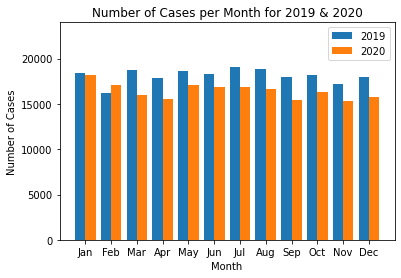

In [70]:
months2019 = df2019['Month'].value_counts()
months2020 = df2020['Month'].value_counts()

X = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
m2019 = [months2019[1], months2019[2], months2019[3], months2019[4], months2019[5], months2019[6], 
         months2019[7], months2019[8], months2019[9], months2019[10], months2019[11], months2019[12] ]
m2020 = [months2020[1], months2020[2], months2020[3], months2020[4], months2020[5], months2020[6], 
         months2020[7], months2020[8], months2020[9], months2020[10], months2020[11], months2020[12] ]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, m2019, 0.4, label = '2019')
plt.bar(X_axis + 0.2, m2020, 0.4, label = '2020')
  
plt.xticks(X_axis, X)
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.title("Number of Cases per Month for 2019 & 2020")
plt.legend()
plt.ylim(0, 24000)

plt.savefig('../../Graphs and Plots/a1.png')
plt.show()

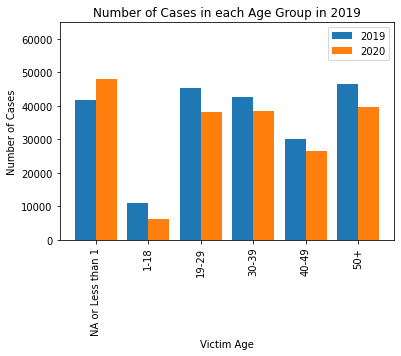

In [71]:
#bar chart refering to number of crimes occured where victim is of a certain age group 2019
age_sort2019 = df2019.sort_values(by = ['Vict Age'])
age_count2019 = age_sort2019['Vict Age'].value_counts()
age_data2019 = age_sort2019['Vict Age']
age_data2019 = age_data2019.reset_index(drop=True)


not_listed19 = 0
ten19 = 0
twenty19 = 0
thirty19 = 0
forty19 = 0
older19 = 0

for age in age_data2019:
    
    if age <= 0:
        not_listed19 += 1
    elif age < 19:
        ten19 += 1
    elif age < 30:
        twenty19 += 1
    elif age < 40:
        thirty19 += 1
    elif age < 50:
        forty19 += 1
    else:
        older19 += 1

#bar chart refering to number of crimes occured where victim is of a certain age group 2020
age_sort20 = df2020.sort_values(by = ['Vict Age'])
age_count20 = age_sort20['Vict Age'].value_counts()
age_data20 = age_sort20['Vict Age']
age_data20 = age_data20.reset_index(drop=True)


not_listed20 = 0
ten20 = 0
twenty20 = 0
thirty20 = 0
forty20 = 0
older20 = 0

for age20 in age_data20:
    
    if age20 <= 0:
        not_listed20 += 1
    elif age20 < 19:
        ten20 += 1
    elif age20 < 30:
        twenty20 += 1
    elif age20 < 40:
        thirty20 += 1
    elif age20 < 50:
        forty20 += 1
    else:
        older20 += 1

x = ['NA or Less than 1', '1-18', '19-29', '30-39', '40-49', '50+']
a2019 = [not_listed19, ten19, twenty19, thirty19, forty19, older19]
a2020 = [not_listed20, ten20, twenty20, thirty20, forty20, older20]

X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, a2019, 0.4, label = '2019')
plt.bar(X_axis + 0.2, a2020, 0.4, label = '2020')

plt.xticks(X_axis, x, rotation = 'vertical')
plt.xlabel('Victim Age')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in each Age Group in 2019 & 2020')
#for x, v in enumerate(y):
#    plt.text(x, v, str(v), horizontalalignment = 'center', verticalalignment = 'bottom')
plt.ylim(0, 65000)
plt.legend()
plt.savefig('../../Graphs and Plots/a2.png')
plt.show()

In [ ]:
#go into depth 

Text(0.5, 1.0, 'Victim Gender in 2020')

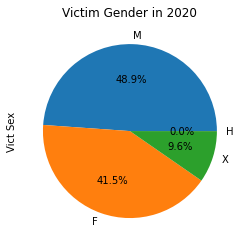

In [8]:
#pie chart showing victim gender given with data
gender_values = df2020['Vict Sex'].value_counts()
gender_pie2020 = gender_values.plot(kind ='pie', autopct='%1.1f%%')
plt.title('Victim Gender in 2020')

Text(0.5, 1.0, 'Victim Gender in 2019')

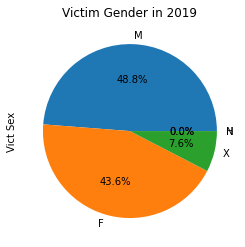

In [9]:
#pie chart showing victim gender given with data
gender_values = df2019['Vict Sex'].value_counts()
gender_pie2019 = gender_values.plot(kind ='pie', autopct='%1.1f%%')
plt.title('Victim Gender in 2019')

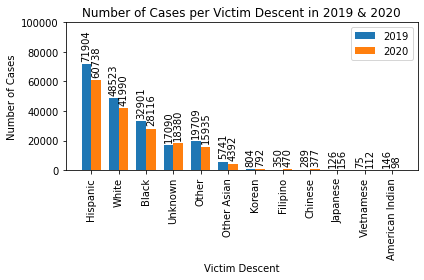

In [88]:
#Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian 
                #F - Filipino G - Guamanian H - Hispanic/Latin/Mexican 
                #I - American Indian/Alaskan Native J - Japanese K - Korean 
                #L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian 
                #V - Vietnamese W - White X - Unknown Z - Asian Indian
race2019 = df2019['Vict Descent'].value_counts().head(12)
race2020 = df2020['Vict Descent'].value_counts().head(12)

x = ['Hispanic', 'White', 'Black', 'Unknown', 'Other', 'Other Asian', 'Korean', 
     'Filipino', 'Chinese', 'Japanese', 'Vietnamese', 'American Indian']
r2019 = [race2019['H'], race2019['W'], race2019['B'], race2019['X'], race2019['O'], race2019['A'], 
         race2019['K'], race2019['F'], race2019['C'], race2019['J'], race2019['V'], race2019['I'] ]
r2020 = [race2020['H'], race2020['W'], race2020['B'], race2020['X'], race2020['O'], race2020['A'], 
         race2020['K'], race2020['F'], race2020['C'], race2020['J'], race2020['V'], race2020['I'] ]

x_axis = np.arange(len(x))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x_axis - width/2, r2019, width, label=2019)
rects2 = ax.bar(x_axis + width/2, r2020, width, label=2020)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Victim Descent')
ax.set_title('Number of Cases per Victim Descent in 2019 & 2020')
ax.set_xticks(x_axis)
ax.set_xticklabels(x, rotation = 'vertical')
ax.legend()

ax.bar_label(rects1, padding=3, rotation = 'vertical')
ax.bar_label(rects2, padding=3, rotation = 'vertical')
plt.ylim(0, 100000)
fig.tight_layout()

plt.savefig('../../Graphs and Plots/victimdescent20192020.png')
plt.show()

In [45]:
race2019 = df2019['Vict Descent'].value_counts().head(12)
race2019

H    71904
W    48523
B    32901
O    19709
X    17090
A     5741
K      804
F      350
C      289
I      146
J      126
V       75
Name: Vict Descent, dtype: int64

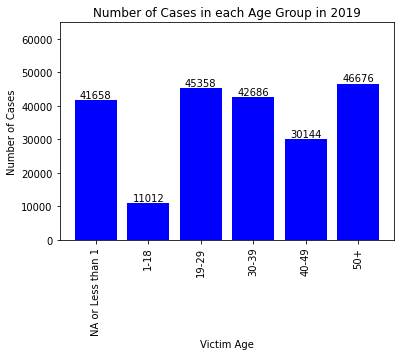

In [40]:
#bar chart refering to number of crimes occured where victim is of a certain age group
age_sort = df2019.sort_values(by = ['Vict Age'])
age_count = age_sort['Vict Age'].value_counts()
x = age_sort['Vict Age'].unique()

age_data = age_sort['Vict Age']
age_data = age_data.reset_index(drop=True)


not_listed = 0
ten = 0
twenty = 0
thirty = 0
forty = 0
older = 0

for age in age_data:
    
    if age <= 0:
        not_listed += 1
    elif age < 19:
        ten += 1
    elif age < 30:
        twenty += 1
    elif age < 40:
        thirty += 1
    elif age < 50:
        forty += 1
    else:
        older += 1

x = ['NA or Less than 1', '1-18', '19-29', '30-39', '40-49', '50+']
y = [not_listed, ten, twenty, thirty, forty, older]
plt.bar(x, y, align = 'center', color = 'b')
plt.xticks(rotation = 'vertical')
plt.xlabel('Victim Age')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in each Age Group in 2019')
for x, v in enumerate(y):
    plt.text(x, v, str(v), horizontalalignment = 'center', verticalalignment = 'bottom')
plt.ylim(0, 65000)
plt.show()

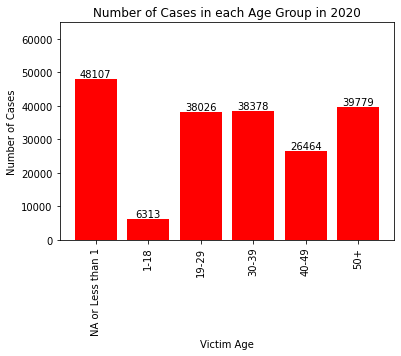

In [37]:
#bar chart refering to number of crimes occured where victim is of a certain age group
age_sort = df2020.sort_values(by = ['Vict Age'])
age_count = age_sort['Vict Age'].value_counts()
x = age_sort['Vict Age'].unique()

age_data = age_sort['Vict Age']
age_data = age_data.reset_index(drop=True)


not_listed = 0
ten = 0
twenty = 0
thirty = 0
forty = 0
older = 0

for age in age_data:
    
    if age <= 0:
        not_listed += 1
    elif age < 19:
        ten += 1
    elif age < 30:
        twenty += 1
    elif age < 40:
        thirty += 1
    elif age < 50:
        forty += 1
    else:
        older += 1

x = ['NA or Less than 1', '1-18', '19-29', '30-39', '40-49', '50+']
y = [not_listed, ten, twenty, thirty, forty, older]
plt.bar(x, y, align = 'center', color = 'r')
plt.xticks(rotation = 'vertical')
plt.xlabel('Victim Age')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in each Age Group in 2020')
for x, v in enumerate(y):
    plt.text(x, v, str(v), horizontalalignment = 'center', verticalalignment = 'bottom')
plt.ylim(0, 65000)
plt.show()

In [47]:
#according to the data, the most frequent crime that occurs in LA is vehicle theft
df2020['Crm Cd Desc'].value_counts().head(10)

VEHICLE - STOLEN                                           20725
BATTERY - SIMPLE ASSAULT                                   16292
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    12884
BURGLARY                                                   12773
BURGLARY FROM VEHICLE                                      12675
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             11520
INTIMATE PARTNER - SIMPLE ASSAULT                          10795
THEFT PLAIN - PETTY ($950 & UNDER)                         10781
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             9687
THEFT OF IDENTITY                                           7626
Name: Crm Cd Desc, dtype: int64

In [48]:
df2019['Crm Cd Desc'].value_counts().head(10)

BATTERY - SIMPLE ASSAULT                                   18936
BURGLARY FROM VEHICLE                                      16659
VEHICLE - STOLEN                                           15350
THEFT PLAIN - PETTY ($950 & UNDER)                         15341
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    12840
BURGLARY                                                   12625
INTIMATE PARTNER - SIMPLE ASSAULT                          12096
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             10815
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            10200
THEFT OF IDENTITY                                           9112
Name: Crm Cd Desc, dtype: int64

In [35]:
#none of these areas should be disregarded, however due to our limited time, we will be focusing on the area that
#pertains to the most vehicle theft cases (77th Street)
stolen_vehicle2020 = df2020.loc[df['Crm Cd Desc']== 'VEHICLE - STOLEN']
#stolen_vehicle.head()
stolen_vehicle2020['AREA NAME'].value_counts()

77th Street    2504
Newton         2381
Southeast      2084
Hollenbeck     1951
Pacific        1764
Mission        1762
Harbor         1742
Southwest      1699
Northeast      1644
Olympic        1520
Rampart        1502
N Hollywood    1485
Foothill       1448
Van Nuys       1391
Hollywood      1191
West Valley    1183
Devonshire     1114
Wilshire       1095
Topanga        1090
Central        1005
West LA         998
Name: AREA NAME, dtype: int64

In [36]:
df2020['TIME OCC'].value_counts()

1200    10801
1800     8616
1700     8288
2000     8000
1900     7396
        ...  
609         2
632         2
757         2
841         2
741         1
Name: TIME OCC, Length: 1439, dtype: int64

In [37]:
noon_crimes = df.loc[df['TIME OCC']== 1200]
noon_crimes['Crm Cd Desc'].value_counts()

THEFT OF IDENTITY                                  1514
VEHICLE - STOLEN                                   1043
BURGLARY                                            829
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)     817
THEFT PLAIN - PETTY ($950 & UNDER)                  614
                                                   ... 
DOCUMENT WORTHLESS ($200 & UNDER)                     1
VIOLATION OF TEMPORARY RESTRAINING ORDER              1
ILLEGAL DUMPING                                       1
BOAT - STOLEN                                         1
CHILD ABANDONMENT                                     1
Name: Crm Cd Desc, Length: 100, dtype: int64

In [38]:
stolen_vehicle['TIME OCC'].value_counts()

2000    1850
1800    1779
1900    1632
2200    1614
1700    1524
        ... 
1324       1
357        1
1319       1
1318       1
1213       1
Name: TIME OCC, Length: 833, dtype: int64

In [39]:
ss_street = stolen_vehicle.loc[stolen_vehicle['AREA NAME'] == '77th Street']
ss_street['TIME OCC'].value_counts().head(7)

2200    135
2100    135
2000    132
1800    114
1900    111
1700    107
2300     96
Name: TIME OCC, dtype: int64

In [47]:
filtered_sv = ss_street.loc[ss_street['TIME OCC'].isin([2200, 2100, 2000, 1800, 1900])]
                            
filtered_sv['Premis Desc'].value_counts()

STREET                         578
DRIVEWAY                        21
PARKING LOT                     19
ALLEY                            6
GARAGE/CARPORT                   2
YARD (RESIDENTIAL/BUSINESS)      1
Name: Premis Desc, dtype: int64

In [48]:
locations = filtered_sv[['LAT', 'LON']]

fig = gmaps.figure(center = (20.0, 15.0), zoom_level = 2)
markers = gmaps.marker_layer(locations, info_box_content = "test")

fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION,LAT,LON
137,05/27/2020 12:00:00 AM,05/25/2020 12:00:00 AM,1640,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,48TH ST,33.9997,-118.2827
801,03/28/2020 12:00:00 AM,03/28/2020 12:00:00 AM,240,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,3000 W SLAUSON AV,33.9891,-118.3258
1295,03/24/2020 12:00:00 AM,03/21/2020 12:00:00 AM,900,77th Street,VEHICLE - STOLEN,0,F,B,STREET,NaN,84TH PL,33.9624,-118.2783
2571,10/12/2020 12:00:00 AM,10/11/2020 12:00:00 AM,1700,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,82ND ST,33.9643,-118.2871
2859,06/01/2020 12:00:00 AM,06/01/2020 12:00:00 AM,1200,77th Street,VEHICLE - STOLEN,0,NaN,NaN,DRIVEWAY,NaN,700 E 76TH PL,33.9703,-118.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301222,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,430,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,800 E 82ND ST,33.9647,-118.2608
301251,02/11/2021 12:00:00 AM,02/10/2021 12:00:00 AM,2300,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,200 E 80TH ST,33.967,-118.2717
301256,05/15/2021 12:00:00 AM,05/10/2021 12:00:00 AM,1238,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,3500 W 60TH ST,33.9854,-118.3338
301443,01/11/2021 12:00:00 AM,01/10/2021 12:00:00 AM,2300,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,400 E 74TH ST,33.973,-118.2657


In [50]:
url = "https://data.lacity.org/resource/63jg-8b9z.json"
response = requests.get(url).json()

#setting up data to make table/DataFrame
#creating lists to 
date_reported = []
date_occured = []
time_occured = []
area_name = []
crime_desc = []
vict_age = []
gender = []
vict_descent = []
premis_description = []
weapon_used = []
location = []
lat = []
lng = []

crime_list = []
for crime in response:
    dict = {'Date Reported':crime['date_rptd'], 'Date Occured':crime['date_occ'], 'Time Occured':crime['time_occ'], 
           'Area Name':crime['area_name'], 'Crime Type':crime['crm_cd_desc'], 'Victim Age':crime['vict_age'],
           'Premise':crime['premis_desc'], 'Location':crime['location'], 'Latitude':crime['lat'], 'Longitude':crime['lon']}
    
    date_reported.append(crime['date_rptd'])
    date_occured.append(crime['date_occ'])
    time_occured.append(crime['time_occ'])
    area_name.append(crime['area_name'])
    crime_desc.append(crime['crm_cd_desc'])
    vict_age.append(crime['vict_age'])
    
    premis_description.append(crime['premis_desc'])
   
    location.append(crime['location'])
    lat.append(crime['lat'])
    lng.append(crime['lon'])
    try:
        gender.append(crime['vict_sex'])
        vict_descent.append(crime['vict_descent'])
        weapon_used.append(crime['weapon_desc'])
        dict['Victim Gender'] = crime['vict_sex']
        dict['Victim Descent']= crime['vict_descent']
        dict['Weapon Used']= crime['weapon_desc']
    except:
        gender.append("NA+x")
        vict_descent.append('NA+x')
        weapon_used.append('NA+x')
     
    crime_list.append(dict)
    

In [ ]:
#response[0]

In [52]:
#merging crime_list into dataframe
crime_df = pd.DataFrame(crime_list)
#reordering columns
crime_df = crime_df[['Date Reported', 'Date Occured', 'Time Occured', 'Area Name', 'Crime Type','Weapon Used', 
                     'Victim Age', 'Victim Gender', 'Victim Descent', 'Premise', 'Location', 
                     'Latitude', 'Longitude']]
crime_df.head(-5)

,Date Reported,Date Occured,Time Occured,Area Name,Crime Type,Weapon Used,Victim Age,Victim Gender,Victim Descent,Premise,Location,Latitude,Longitude
0,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,1350,Newton,VIOLATION OF COURT ORDER,NaN,48,NaN,NaN,SINGLE FAMILY DWELLING,300 E GAGE AV,33.9825,-118.2695
1,2010-09-13T00:00:00.000,2010-09-12T00:00:00.000,0045,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,0,NaN,NaN,STREET,SEPULVEDA BL,33.9599,-118.3962
2,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,1515,Newton,OTHER MISCELLANEOUS CRIME,NaN,0,NaN,NaN,ALLEY,1300 E 21ST ST,34.0224,-118.2524
3,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,0150,Hollywood,VIOLATION OF COURT ORDER,HAND GUN,47,F,W,STREET,CAHUENGA BL,34.1016,-118.3295
4,2010-01-03T00:00:00.000,2010-01-02T00:00:00.000,2100,Central,"RAPE, ATTEMPTED","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",47,F,H,ALLEY,8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2010-02-05T00:00:00.000,2010-02-04T00:00:00.000,1705,Central,BATTERY - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",41,F,O,SIDEWALK,6TH,34.0423,-118.2452
991,2010-02-05T00:00:00.000,2010-02-04T00:00:00.000,0100,Central,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",UNKNOWN WEAPON/OTHER WEAPON,52,M,B,"BUS DEPOT/TERMINAL, OTHER THAN MTA",800 N ALAMEDA ST,34.0563,-118.2374
992,2010-02-05T00:00:00.000,2010-02-05T00:00:00.000,0130,Central,BATTERY WITH SEXUAL CONTACT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",49,F,W,SIDEWALK,MAIN ST,34.0482,-118.2472
993,2010-02-05T00:00:00.000,2010-02-05T00:00:00.000,0920,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,NaN,57,NaN,NaN,OTHER PREMISE,600 SAN JULIAN ST,34.0428,-118.2461
